

This dataset contains the dynamic analysis of 582 samples of ransomware and 942 of good applications (goodware). The total feature size is 30K+, including many software operations (calling API, registry key operations ...).

For details please refer the origin github location: (github location: https://github.com/rissgrouphub/ransomwaredataset2016)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
INPUT_PATH = 'C:/Users/MYPC/Desktop/shivsaran/Ransomware/Ransomware.csv'

In [6]:
INPUT_PATH = 'C:/Users/MYPC/Desktop/shivsaran/Ransomware/'
f1= open(INPUT_PATH + 'VariableNames.txt', encoding = 'utf-8')

columns=[]
for i in f1:
    column = i.split(';')
    columns.append(column[1].replace('\n', ''))

In [7]:
columns[0:5]

['ID',
 'Label (1 Ransomware / 0 Goodware)',
 'Ransomware Family',
 'API:GetSystemDirectoryA',
 'API:WriteConsoleA']

In [8]:
data = pd.read_csv(INPUT_PATH + 'RansomwareData.csv', header=None,names=columns)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Columns: 30970 entries, ID to STR:16267
dtypes: int64(30970)
memory usage: 360.1 MB


In [10]:
data.head()

,ID,Label (1 Ransomware / 0 Goodware),Ransomware Family,API:GetSystemDirectoryA,API:WriteConsoleA,API:NtOpenFile,API:NtCreateProcessEx,API:GetSystemInfo,API:WriteConsoleW,API:NtReadVirtualMemory,...,STR:16258,STR:16259,STR:16260,STR:16261,STR:16262,STR:16263,STR:16264,STR:16265,STR:16266,STR:16267
0,10001,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#drop features that are all 0
data = data.loc[:, (data != 0).any(axis=0)]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Columns: 23619 entries, ID to STR:16267
dtypes: int64(23619)
memory usage: 274.6 MB


In [13]:
#seperate data to data_ransomware and data_goodware
data_ransomware = data.loc[(data['Label (1 Ransomware / 0 Goodware)'] == 1)]
data_goodware = data.loc[(data['Label (1 Ransomware / 0 Goodware)'] == 0)]

In [14]:
#drop features that are all 0
data_ransomware = data_ransomware.loc[:, (data_ransomware != 0).any(axis=0)]
data_goodware = data_goodware.loc[:, (data_goodware != 0).any(axis=0)]

In [15]:
data_ransomware.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 581
Columns: 3412 entries, ID to STR:16240
dtypes: int64(3412)
memory usage: 15.2 MB


In [16]:
data_ransomware.describe()

,ID,Label (1 Ransomware / 0 Goodware),Ransomware Family,API:GetSystemDirectoryA,API:NtOpenFile,API:NtCreateProcessEx,API:GetSystemInfo,API:WriteConsoleW,API:NtReadVirtualMemory,API:RemoveDirectoryA,...,STR:16011,STR:16042,STR:16047,STR:16142,STR:16146,STR:16173,STR:16182,STR:16211,STR:16226,STR:16240
count,582.000000,582.0,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,...,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,10606.836770,1.0,5.314433,0.264605,0.537801,0.005155,0.326460,0.054983,0.170103,0.010309,...,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718,0.003436,0.003436,0.001718,0.001718
std,350.289876,0.0,2.962026,0.441502,0.498998,0.071672,0.469321,0.228143,0.376047,0.101097,...,0.041451,0.041451,0.041451,0.041451,0.041451,0.041451,0.058571,0.058571,0.041451,0.041451
min,10001.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10306.250000,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10591.000000,1.0,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10914.750000,1.0,7.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11221.000000,1.0,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
data_goodware.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 582 to 1523
Columns: 21504 entries, ID to STR:16267
dtypes: int64(21504)
memory usage: 154.6 MB


In [18]:
data_goodware.describe()

,ID,API:GetSystemDirectoryA,API:WriteConsoleA,API:NtOpenFile,API:GetSystemInfo,API:WriteConsoleW,API:NtReadVirtualMemory,API:RemoveDirectoryA,API:GetKeyState,API:NtQueryKey,...,STR:16247,STR:16252,STR:16253,STR:16255,STR:16256,STR:16259,STR:16260,STR:16261,STR:16264,STR:16267
count,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,...,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000
mean,20629.182590,0.315287,0.005308,0.787686,0.636943,0.010616,0.718684,0.065817,0.409766,0.367304,...,0.001062,0.001062,0.001062,0.001062,0.001062,0.002123,0.001062,0.001062,0.001062,0.002123
std,361.939422,0.464877,0.072700,0.409163,0.481137,0.102539,0.449880,0.248094,0.492052,0.482326,...,0.032582,0.032582,0.032582,0.032582,0.032582,0.046053,0.032582,0.032582,0.032582,0.046053
min,20001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20317.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20650.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20929.250000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21259.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Dictionary: feature -> total count for ransomware
dic_ransomware = {}
for columnName, columnData in data_ransomware.items():
    dic_ransomware[columnName] = columnData.sum()

# Safely remove keys if they exist
dic_ransomware.pop('Ransomware Family', None)
dic_ransomware.pop('Label (1 Ransomware / 0 Goodware)', None)

# Dictionary: feature -> total count for goodware
dic_goodware = {}
for columnName, columnData in data_goodware.items():
    dic_goodware[columnName] = columnData.sum()

# Also safe pop for goodware (if needed)
dic_goodware.pop('Ransomware Family', None)
dic_goodware.pop('Label (1 Ransomware / 0 Goodware)', None)


In [21]:
#sort by count, desc
sorted_dic_ransomware = sorted(dic_ransomware.items(),key = lambda x:x[1],reverse = True)
sorted_dic_goodware = sorted(dic_goodware.items(),key = lambda x:x[1],reverse = True)

In [22]:
# top 10 that ransomware do
sorted_dic_ransomware_top10 = sorted_dic_ransomware[0:11]
for var in sorted_dic_ransomware_top10:
    print(var)

('ID', np.int64(6173179))
('API:NtReadFile', np.int64(580))
('API:NtClose', np.int64(580))
('API:NtOpenKey', np.int64(579))
('API:UuidCreate', np.int64(579))
('API:NtQueryValueKey', np.int64(579))
('API:NtWriteFile', np.int64(579))
('REG:READ:HKEY_LOCAL_MACHINE\\SECURITY\\Policy\\SecDesc\\', np.int64(579))
('API:CreateThread', np.int64(573))
('API:NtDelayExecution', np.int64(571))
('API:GetSystemTimeAsFileTime', np.int64(569))


In [23]:
# top 10 that goodmware do
sorted_dic_goodware_top10 = sorted_dic_goodware[0:11]
for var in sorted_dic_goodware_top10:
    print(var)

('ID', np.int64(19432690))
('API:NtClose', np.int64(938))
('API:NtReadFile', np.int64(934))
('API:NtOpenKey', np.int64(932))
('API:NtWriteFile', np.int64(932))
('API:NtQueryValueKey', np.int64(931))
('REG:READ:HKEY_LOCAL_MACHINE\\SECURITY\\Policy\\SecDesc\\', np.int64(931))
('API:UuidCreate', np.int64(929))
('API:CreateThread', np.int64(921))
('API:GetSystemTimeAsFileTime', np.int64(921))
('API:NtDelayExecution', np.int64(919))


In [24]:
#ransomware do but goodware not do
set_diff_ransomware_only = dic_ransomware.keys() - dic_goodware.keys()
len(set_diff_ransomware_only)

2113

In [25]:
#goodware do but ransomware not do
set_diff_goodware_only = dic_goodware.keys() - dic_ransomware.keys()
len(set_diff_goodware_only)

20207

In [27]:
# only ransomware do, top 10
i = 0
for var in sorted_dic_ransomware:
    if i == 10:
        break
    if var[0] in set_diff_ransomware_only:
        print(i, ": ", var[0], var[1])
        i = i+1

0 :  REG:READ:HKEY_CURRENT_USER\Software\Microsoft\Windows\CurrentVersion\Explorer\MountPoints2\CPC\Volume\{e7136b30-a421-11e5-b597-806d6172696f}\ 60
1 :  REG:WRITTEN:HKEY_CURRENT_USER\Software\Microsoft\Windows\CurrentVersion\Explorer\MountPoints2\{e7136b30-a421-11e5-b597-806d6172696f}\ 60
2 :  API:RtlDecompressBuffer 42
3 :  STR:7719 36
4 :  STR:13633 34
5 :  STR:12693 33
6 :  REG:OPENED:HKEY_LOCAL_MACHINE\SOFTWARE\{12DA0E6F-5543-440C-BAA2-28BF01070AFA}\_2e4fc70e\ 28
7 :  REG:OPENED:HKEY_CURRENT_USER\SOFTWARE\AppDataLow\{12DA0E6F-5543-440C-BAA2-28BF01070AFA}\ 28
8 :  REG:OPENED:HKEY_CURRENT_USER\SOFTWARE\AppDataLow\{12DA0E6F-5543-440C-BAA2-28BF01070AFA}\_2e4fc70e\ 28
9 :  REG:OPENED:HKEY_LOCAL_MACHINE\SOFTWARE\8af35fd5-1a6a-db39-3f16-f360d0c45e1c\ 28


In [28]:
# only goodware do, top 10
i = 0
for var in sorted_dic_goodware:
    if i == 10:
        break
    if var[0] in set_diff_goodware_only:
        print(i, ": ", var[0], var[1])
        i = i+1

0 :  FILES_EXT:OPENED:msi 101
1 :  FILES_EXT:WRITTEN:msi 101
2 :  DROP:msi 99
3 :  REG:OPENED:HKEY_LOCAL_MACHINE\Software\Classes\Installer\Products\ 84
4 :  DIR:ENUMERATED:C:\Program Files\MSECache\ 83
5 :  REG:OPENED:HKEY_LOCAL_MACHINE\Software\Microsoft\Windows\CurrentVersion\Installer\Managed\S-1-5-21-2000478354-1606980848-1343024091-1003\Installer\Products\ 81
6 :  REG:OPENED:HKEY_CURRENT_USER\Software\Microsoft\Installer\Products\ 81
7 :  DROP:log 64
8 :  REG:OPENED:HKEY_LOCAL_MACHINE\Software\Microsoft\Windows\CurrentVersion\App Paths\ 58
9 :  FILES_EXT:READ:msi 57


In [29]:
#rename this column data['Label (1 Ransomware / 0 Goodware)'] for label

data.rename(columns={'Label (1 Ransomware / 0 Goodware)': 'label'}, inplace=True)


In [30]:
data.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/Data.csv')



In [31]:
# prompt: data.columns datatype

#This function, "Missing_Values," analyzes a DataFrame's columns, collecting data on variable names,
#data types, total values, missing values, and unique values. It returns a sorted summary of missing data.
def Missing_Unique_datatypes_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []

    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))

    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "Total_Value":total_value,\
                               "Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })

    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("Total_Missing_Value",ascending=False)

In [32]:
Missing_Unique_datatypes_Values(data)

,Total_Value,Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
STR:16267,1524,0,0.0,int64,"[0, 1]",2
ID,1524,0,0.0,int64,"[10001, 10002, 10003, 10005, 10006, 10007, 100...",1524
label,1524,0,0.0,int64,"[1, 0]",2
STR:16238,1524,0,0.0,int64,"[0, 1]",2
STR:16236,1524,0,0.0,int64,"[0, 1]",2
...,...,...,...,...,...,...
API:GetSystemInfo,1524,0,0.0,int64,"[0, 1]",2
API:NtCreateProcessEx,1524,0,0.0,int64,"[0, 1]",2
API:NtOpenFile,1524,0,0.0,int64,"[0, 1]",2


In [33]:
# prompt: drop duplicates

data = data.drop_duplicates()


In [34]:
data['Ransomware Family'].nunique()

12

 **Visulaization**

In [35]:
viz_df = data.copy()

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 1 with 'Ransomware' and 0 with 'Goodware' for visualization purposes
viz_df['label'] = viz_df['label'].replace({1: 'Ransomware', 0: 'Goodware'})

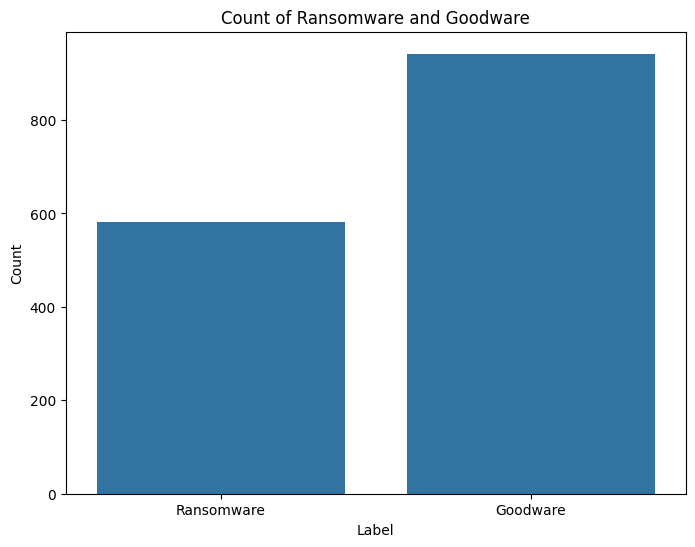

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=viz_df, x='label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Ransomware and Goodware')
plt.show()


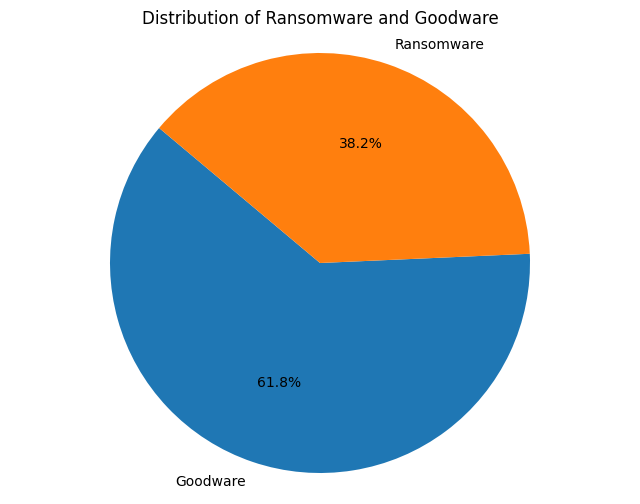

In [38]:
label_counts = viz_df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ransomware and Goodware')
plt.axis('equal')
plt.show()


In [39]:
# Assuming df is your DataFrame with columns 'label' and 'Ransomware Family'

# Define the mapping between ID and Family Name
family_mapping = {
    0: 'Goodware',
    1: 'Critroni',
    2: 'CryptLocker',
    3: 'CryptoWall',
    4: 'KOLLAH',
    5: 'Kovter',
    6: 'Locker',
    7: 'MATSNU',
    8: 'PGPCODER',
    9: 'Reveton',
    10: 'TeslaCrypt',
    11: 'Trojan-Ransom'
}

# Replace 'Ransomware Family' IDs with Family Names in the DataFrame
viz_df['Ransomware Family'] = viz_df['Ransomware Family'].map(family_mapping)

viz_df['Ransomware Family']


0       CryptLocker
1        CryptoWall
2       CryptLocker
3            Kovter
4            MATSNU
           ...     
1519       Goodware
1520       Goodware
1521       Goodware
1522       Goodware
1523       Goodware
Name: Ransomware Family, Length: 1524, dtype: object

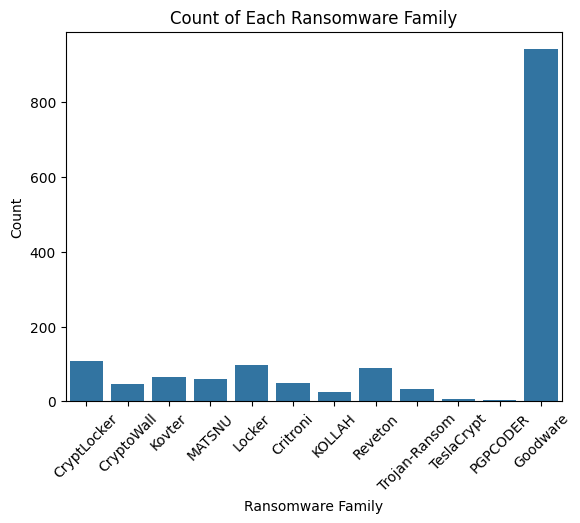

In [40]:
sns.countplot(data=viz_df, x='Ransomware Family')
plt.xticks(rotation=45)
plt.xlabel('Ransomware Family')
plt.ylabel('Count')
plt.title('Count of Each Ransomware Family')
plt.show()


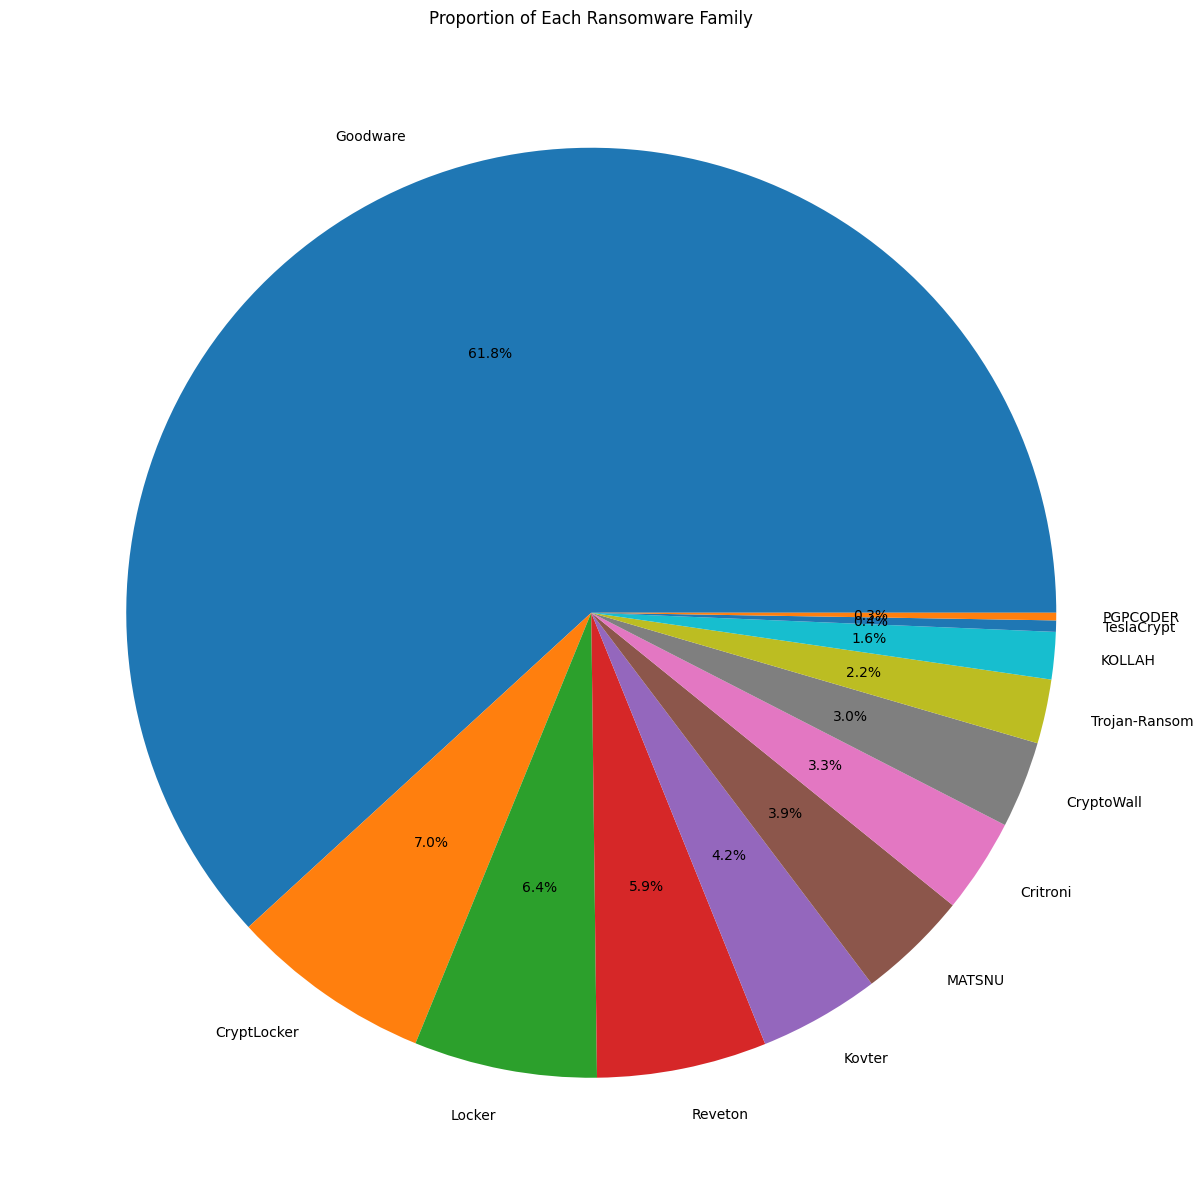

In [41]:
family_counts = viz_df['Ransomware Family'].value_counts()
plt.figure(figsize=(15, 20))
plt.pie(family_counts, labels=family_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Each Ransomware Family')
plt.show()


In [42]:
data['Ransomware Family']

0       2
1       3
2       2
3       5
4       7
       ..
1519    0
1520    0
1521    0
1522    0
1523    0
Name: Ransomware Family, Length: 1524, dtype: int64

In [43]:
data.shape

(1524, 23619)

In [44]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming 'X' contains the features and 'y' contains the target variable
# Replace 'feature_columns' and 'target_column' with your actual column names

feature_columns = data.drop(['label','ID'], axis=1)  # Adjust column names as needed
target_column = data['label']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE on the data
X_resampled, y_resampled = smote.fit_resample(feature_columns, target_column)

# Show the class distribution before and after SMOTE
print("Before SMOTE:", Counter(target_column))
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({0: 942, 1: 582})
After SMOTE: Counter({1: 942, 0: 942})


In [45]:
X_resampled.shape

(1884, 23617)

In [47]:
y_resampled

0       1
1       1
2       1
3       1
4       1
       ..
1879    1
1880    1
1881    1
1882    1
1883    1
Name: label, Length: 1884, dtype: int64

In [48]:
X_SMOTE= X_resampled.copy()
y_SMOTE= y_resampled.copy()

In [49]:
# prompt: X= X_resampled.copy() y= y_resampled.copy() , combine this to one dataframe

df_SMOTE = pd.concat([X_SMOTE, y_SMOTE], axis=1)
df_SMOTE

,Ransomware Family,API:GetSystemDirectoryA,API:WriteConsoleA,API:NtOpenFile,API:NtCreateProcessEx,API:GetSystemInfo,API:WriteConsoleW,API:NtReadVirtualMemory,API:RemoveDirectoryA,API:GetKeyState,...,STR:16252,STR:16253,STR:16255,STR:16256,STR:16259,STR:16260,STR:16261,STR:16264,STR:16267,label
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1880,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1881,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1882,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
# Save y_test_label_G_OR_B to CSV
df_SMOTE.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/SMOTE_DF.csv', index=False)


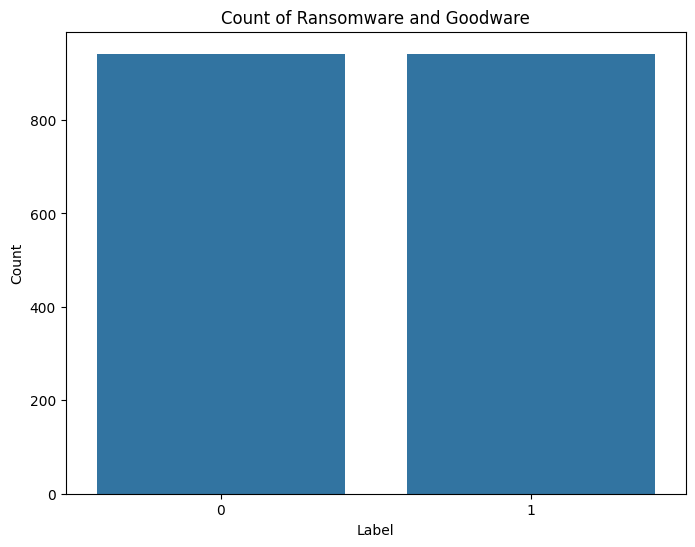

In [52]:
# prompt: plot a count plot on label of df

plt.figure(figsize=(8, 6))
sns.countplot(data=df_SMOTE, x='label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Ransomware and Goodware')
plt.show()


In [53]:
# prompt: drop label and create X and y

X= df_SMOTE.drop(['label'], axis=1)  # Adjust column names as needed
y= df_SMOTE['label']


In [54]:
X

,Ransomware Family,API:GetSystemDirectoryA,API:WriteConsoleA,API:NtOpenFile,API:NtCreateProcessEx,API:GetSystemInfo,API:WriteConsoleW,API:NtReadVirtualMemory,API:RemoveDirectoryA,API:GetKeyState,...,STR:16247,STR:16252,STR:16253,STR:16255,STR:16256,STR:16259,STR:16260,STR:16261,STR:16264,STR:16267
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1880,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1881,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1882,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1879    1
1880    1
1881    1
1882    1
1883    1
Name: label, Length: 1884, dtype: int64

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X, y are your features and target
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Pair feature names with importances
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort and select top 10 features
top_10_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:11]


In [57]:
Best_10 = pd.DataFrame(top_10_features,columns = ['Features','Importance'])
Best_10

,Features,Importance
0,Ransomware Family,0.080882
1,API:NtReadVirtualMemory,0.020723
2,FILES_EXT:OPENED:tmp,0.019449
3,DROP:tmp,0.016483
4,API:CoInitializeEx,0.015058
5,FILES_EXT:WRITTEN:tmp,0.014693
6,API:CreateDirectoryW,0.013869
7,DIR:ENUMERATED:C:\Documents and Settings\MyUse...,0.012756
8,FILES_EXT:WRITTEN:dll,0.012302
9,FILES_EXT:OPENED:ini,0.010746


In [58]:
Best_df =  Best_10['Features']
Best_df.values

array(['Ransomware Family', 'API:NtReadVirtualMemory',
       'FILES_EXT:OPENED:tmp', 'DROP:tmp', 'API:CoInitializeEx',
       'FILES_EXT:WRITTEN:tmp', 'API:CreateDirectoryW',
       'DIR:ENUMERATED:C:\\Documents and Settings\\MyUser\\Desktop\\test-personal-files\\img\\',
       'FILES_EXT:WRITTEN:dll', 'FILES_EXT:OPENED:ini',
       'API:SetFilePointer'], dtype=object)

In [59]:
X = df_SMOTE[['API:CoInitializeEx',
       'REG:OPENED:HKEY_LOCAL_MACHINE\\Software\\Microsoft\\Windows\\CurrentVersion\\Uninstall\\',
       'API:NtReadVirtualMemory', 'FILES_EXT:WRITTEN:tmp', 'DROP:tmp',
       'API:CreateDirectoryW', 'API:GetFileSize',
       'API:GetFileAttributesW', 'FILES_EXT:OPENED:exe','API:GetFileSize']]

y = df_SMOTE['label']

In [60]:
X

,API:CoInitializeEx,REG:OPENED:HKEY_LOCAL_MACHINE\Software\Microsoft\Windows\CurrentVersion\Uninstall\,API:NtReadVirtualMemory,FILES_EXT:WRITTEN:tmp,DROP:tmp,API:CreateDirectoryW,API:GetFileSize,API:GetFileAttributesW,FILES_EXT:OPENED:exe,API:GetFileSize
0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1879,0,0,0,0,0,0,0,0,1,0
1880,0,0,0,0,0,0,0,0,0,0
1881,0,0,0,0,0,0,0,0,0,0
1882,0,0,0,0,0,0,1,0,1,1


In [61]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1879    1
1880    1
1881    1
1882    1
1883    1
Name: label, Length: 1884, dtype: int64

In [62]:
df = pd.concat([X, y], axis=1)
df

,API:CoInitializeEx,REG:OPENED:HKEY_LOCAL_MACHINE\Software\Microsoft\Windows\CurrentVersion\Uninstall\,API:NtReadVirtualMemory,FILES_EXT:WRITTEN:tmp,DROP:tmp,API:CreateDirectoryW,API:GetFileSize,API:GetFileAttributesW,FILES_EXT:OPENED:exe,API:GetFileSize,label
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1879,0,0,0,0,0,0,0,0,1,0,1
1880,0,0,0,0,0,0,0,0,0,0,1
1881,0,0,0,0,0,0,0,0,0,0,1
1882,0,0,0,0,0,0,1,0,1,1,1


In [63]:

df.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/important_features.csv', index=False)



In [65]:
# prompt: save all the X_train_label_G_OR_B, X_test_label_G_OR_B, y_train_label_G_OR_B, y_test_label_G_OR_B  to csv
from sklearn.model_selection import train_test_split
import pandas as pd

X_label = df.drop('label', axis=1)
y_label = df['label']
X_train_label_G_OR_B, X_test_label_G_OR_B, y_train_label_G_OR_B, y_test_label_G_OR_B = train_test_split(X_label, y_label, test_size=0.20, random_state=42)


# Save X_train_label_G_OR_B to CSV
X_train_label_G_OR_B.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/X_train_G_OR_R.csv', index=False)

# Save X_test_label_G_OR_B to CSV
X_test_label_G_OR_B.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/X_test_G_OR_R.csv', index=False)

# Save y_train_label_G_OR_B to CSV
y_train_label_G_OR_B.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/y_train_G_OR_R.csv', index=False)

# Save y_test_label_G_OR_B to CSV
y_test_label_G_OR_B.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/y_test_G_OR_R.csv', index=False)


In [67]:
# prompt: save all the X_train_label_G_OR_B, X_test_label_G_OR_B, y_train_label_G_OR_B, y_test_label_G_OR_B  to csv

import pandas as pd

X_Family = df
y_Family = df_SMOTE['Ransomware Family']
X_train_Family, X_test_Family, y_train_Family, y_test_Family = train_test_split(X_Family, y_Family, test_size=0.20, random_state=42)


# Save X_train_label_G_OR_B to CSV
X_train_Family.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/X_train_Family.csv', index=False)

# Save X_test_label_G_OR_B to CSV
X_test_Family.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/X_test_Family.csv', index=False)

# Save y_train_label_G_OR_B to CSV
y_train_Family.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/y_train_Family.csv', index=False)

# Save y_test_label_G_OR_B to CSV
y_test_Family.to_csv('C:/Users/MYPC/Desktop/shivsaran/csv/y_test_Family.csv', index=False)


In [68]:
# prompt: print shape of train,test

print(f'X_train_Family shape: {X_train_Family.shape}')
print(f'X_test_Family shape: {X_test_Family.shape}')
print(f'y_train_Family shape: {y_train_Family.shape}')
print(f'y_test_Family shape: {y_test_Family.shape}')


X_train_Family shape: (1507, 11)
X_test_Family shape: (377, 11)
y_train_Family shape: (1507,)
y_test_Family shape: (377,)


In [93]:
import joblib
import os

# Train model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_label_G_OR_B, y_train_label_G_OR_B)

# Save model and column order
os.makedirs('model', exist_ok=True)
joblib.dump(rf_model, 'model/rf_model.pkl')
joblib.dump(X_train_label_G_OR_B.columns.tolist(), 'model/column_order.pkl')




['model/column_order.pkl']